**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO **_TRAIN, EVALUATE, AND INTERPRET A RANDOM FOREST CLASSIFIER ON TABULAR DATA._** 🐍🌲📊**

This script loads a real tabular dataset, fits a **RandomForestClassifier**, evaluates with **accuracy & classification report**, plots a **confusion matrix**, and visualizes **feature importance**. Random Forests handle non-linearities, are robust to noise, and work well out of the box.

### 📦 Import Libraries
We’ll use scikit-learn for dataset/model/metrics and matplotlib for charts. Pandas helps with tidy importance tables.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 📥 Load a Real Tabular Dataset
We’ll use **Breast Cancer Wisconsin** (binary classification).
It has **30 numeric features** (e.g., mean radius, texture) and labels (**malignant/benign**).

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"Features shape: {X.shape} | Target shape: {y.shape}")
print("Classes:", list(target_names))

Features shape: (569, 30) | Target shape: (569,)
Classes: [np.str_('malignant'), np.str_('benign')]


### ✂️ Train/Test Split (Stratified)
Hold out a test set to estimate generalization.
**Stratify** to preserve class balance in both splits.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

### 🤖 Initialize & Train RandomForestClassifier
Random Forest = **ensemble of decision trees**.
Key params you can tune later:
- `n_estimators` → number of trees (higher = stabler, slower)
- `max_depth` → limit tree depth (None lets trees grow fully)
- `min_samples_split` / `min_samples_leaf` → regularize trees
- `class_weight='balanced'` → helpful for imbalanced data
> Note: **No feature scaling is required** for tree models.

In [4]:
rf = RandomForestClassifier(
    n_estimators=300,  # solid default for stability
    max_depth=None,  # grow trees fully; tune if overfitting
    n_jobs=-1,  # use all CPU cores
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 🔮 Predict & Evaluate
Compute **accuracy** and a **classification report** (precision/recall/F1 per class).

In [5]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy: 0.9580

Classification Report:
               precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### 📊 Confusion Matrix (Visual Check)
See correct vs misclassified samples per class.

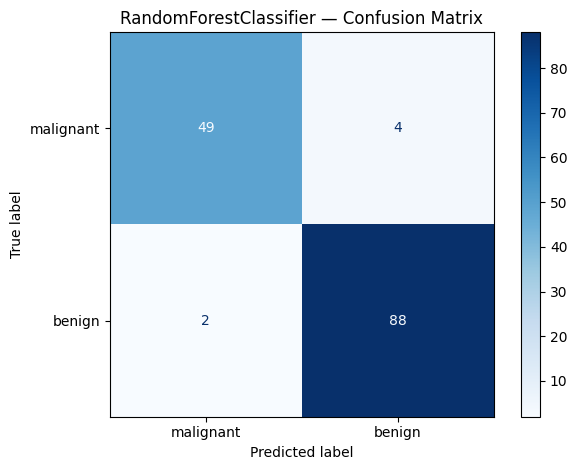

In [6]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=target_names, cmap="Blues"
)
plt.title("RandomForestClassifier — Confusion Matrix")
plt.tight_layout()
plt.show()

### 🌟 Feature Importance (Global Interpretation)
Random Forests provide **impurity-based feature importances**.
We’ll show the **Top 10** to understand drivers of the prediction.

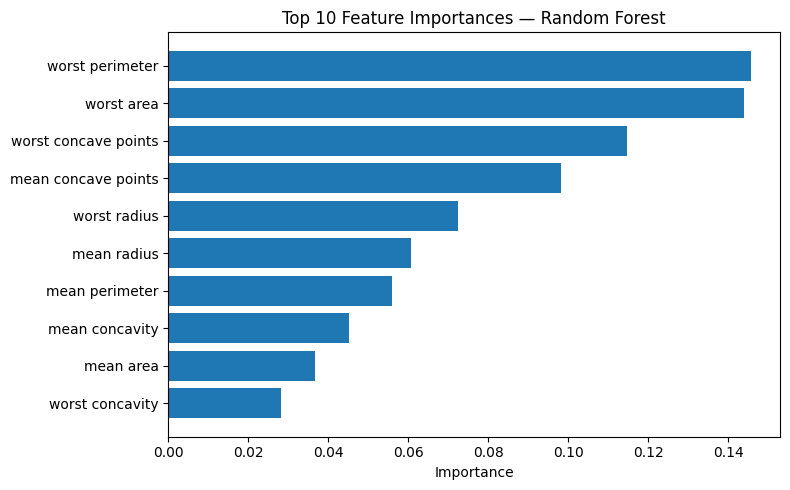

,feature,importance
22,worst perimeter,0.145686
23,worst area,0.144090
27,worst concave points,0.114607
7,mean concave points,0.098307
20,worst radius,0.072351
0,mean radius,0.060713
2,mean perimeter,0.055987
6,mean concavity,0.045211
3,mean area,0.036753
26,worst concavity,0.028162


In [7]:
importances = rf.feature_importances_
imp_df = pd.DataFrame({"feature": feature_names, "importance": importances})
imp_top10 = imp_df.sort_values("importance", ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.barh(imp_top10["feature"], imp_top10["importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances — Random Forest")
plt.tight_layout()
plt.show()

imp_top10

### 📝 Notes & Tips
- Start with defaults; then tune `n_estimators`, `max_depth`, `min_samples_leaf` for speed vs. performance.
- For **imbalance**, try `class_weight='balanced'` or resampling (SMOTE).
- Use **cross-validation** (`cross_val_score`) to get a more reliable estimate.
- Impurity importance can be biased; consider **Permutation Importance** or **SHAP** for deeper insights.